# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this kernel we will be taking a look at Lazy Predict Python Module.This module will help us to compare various machine learning models with very few lines of code.Here I will be sharing the code for Classification and Regression model performance comparision.

1.Classification Model Performance Comparision 

2.Regression Model Performance Comparision 


You can access my other notebooks from the link https://www.kaggle.com/biphili/code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# 1.Model Performance For Classification Model 

### Installing Lazy Predict Module

In [2]:
! pip install lazypredict

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Installing Latest Version of Lazy Predict

In [3]:
#! git clone https://github.com/shankarpandala/lazypredict.git
#% cd lazypredict 
#! python setup.py install

### Importing Python Modules 

In [4]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier 
from sklearn.model_selection import train_test_split 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Importing Data 

In [5]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


### Dropping Unwanted Columns 

In [6]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

### Encoding Categorical Data

In [7]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df['diagnosis'] = lb.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,1,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,1,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,1,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


We have encoded Malignant as 1 and Benign as 0

### Creating Matrix of Features 

In [8]:
X=df.iloc[:,1:32].values
#X
y=df.iloc[:,0].values
#y

### Test Train Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Building a Lazy Classifier 

In [10]:
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
train,test = clf.fit(X_train,X_test,y_train,y_test)

 97%|█████████▋| 29/30 [00:01<00:00, 22.20it/s]

[05:27:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:01<00:00, 18.61it/s]


### Printing Model Performance on Training Data 

In [11]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.01
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.01
AdaBoostClassifier,0.97,0.97,0.97,0.97,0.21
LogisticRegression,0.97,0.97,0.97,0.97,0.03
SGDClassifier,0.96,0.97,0.97,0.97,0.02
ExtraTreeClassifier,0.96,0.97,0.97,0.97,0.01
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.05


In few steps we could compare 28 machine learning models.We have got accuracy,ROC AUC,F1 Score and the time taken to run the model.

### Printing Model Performance on Test Data 

In [12]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.01
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.01
AdaBoostClassifier,0.97,0.97,0.97,0.97,0.21
LogisticRegression,0.97,0.97,0.97,0.97,0.03
SGDClassifier,0.96,0.97,0.97,0.97,0.02
ExtraTreeClassifier,0.96,0.97,0.97,0.97,0.01
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.05


We can see that the model performance is good for train and test data set.So we can sa our models are not overfitting.

### Plotting Model Performance

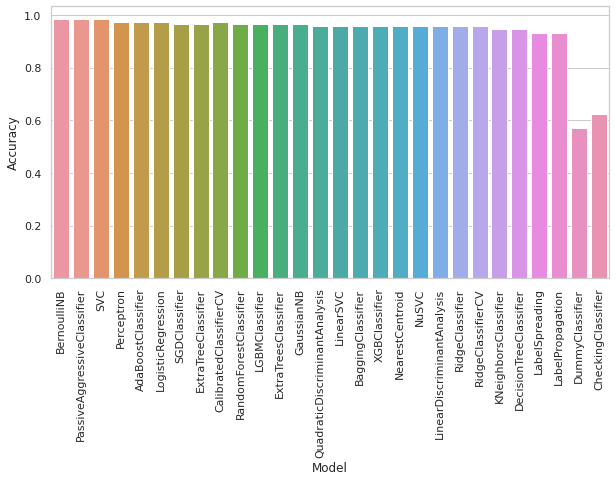

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=train.index,y="Accuracy",data=train)
plt.xticks(rotation=90)
plt.show()

### Making Plot Horizontal

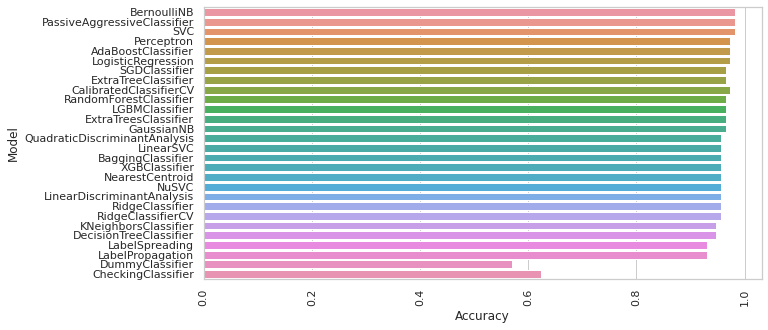

In [14]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index,x="Accuracy",data=train)
plt.xticks(rotation=90)
plt.show()

We can see that it is easier to intrept the results better from the horizontal bar plots.So Just looking at the bar plot we can make a decision that BernouliNB algorithm has the best accuracy.So we can move forward with selecting this algorithm for our prediction.After this we can do hyper parameter tuning and further improve the model performance.

# 2.Model Performance for Regression Model

### Importing Modules 

In [15]:
from sklearn import datasets 
from sklearn.utils import shuffle 
from lazypredict.Supervised import LazyRegressor 

### Loading Dataset

In [16]:
boston = datasets.load_boston()
X, y = shuffle(boston.data,boston.target,random_state=42)

### Spliting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Building Lazy Classifier 

In [18]:
reg = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
train,test = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 42/43 [00:02<00:00, 16.10it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:02<00:00, 14.90it/s]


### Printing Model Performance on Training Data

In [19]:
train

,R-Squared,RMSE,Time Taken
Model,,,
GradientBoostingRegressor,0.90,2.79,0.17
ExtraTreesRegressor,0.88,2.95,0.24
XGBRegressor,0.88,2.96,0.13
RandomForestRegressor,0.88,2.98,0.40
BaggingRegressor,0.88,3.00,0.05
LGBMRegressor,0.87,3.09,0.10
HistGradientBoostingRegressor,0.87,3.12,0.27
AdaBoostRegressor,0.81,3.72,0.12
PoissonRegressor,0.81,3.80,0.02


### Printing Model Performance on Test Data

In [20]:
test

,R-Squared,RMSE,Time Taken
Model,,,
GradientBoostingRegressor,0.90,2.79,0.17
ExtraTreesRegressor,0.88,2.95,0.24
XGBRegressor,0.88,2.96,0.13
RandomForestRegressor,0.88,2.98,0.40
BaggingRegressor,0.88,3.00,0.05
LGBMRegressor,0.87,3.09,0.10
HistGradientBoostingRegressor,0.87,3.12,0.27
AdaBoostRegressor,0.81,3.72,0.12
PoissonRegressor,0.81,3.80,0.02


So we have compared the model performance of more than 30 regression models in no time.We can have compared the models bases on R square and RMSE values.

### Vertical Bar Plot Of Model Performance Comparison 

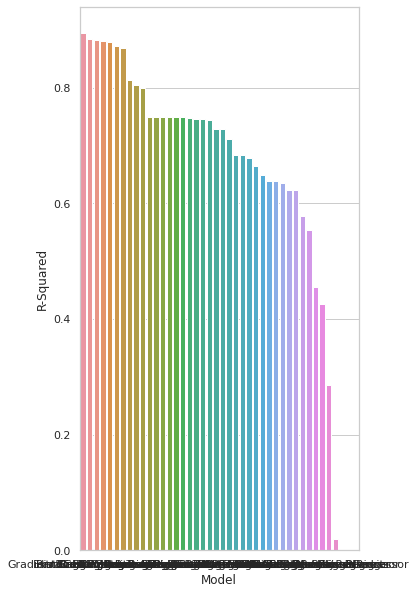

In [21]:
train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0]]

plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=train.index, y="R-Squared",data=train)

### Horizontal Bar Plot Of Model Performance Comparison 

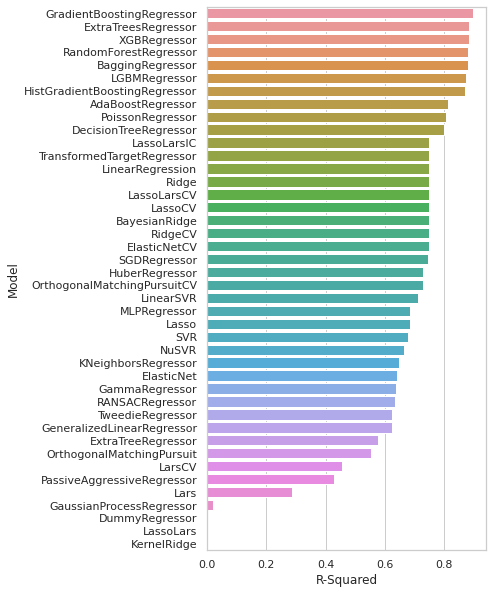

In [22]:
train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0]]

plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared",data=train)

# 3.Conclusion 

So here we have used Lazy Predict to compare various classification and regression models.

Using Lazy Predict reduces the coding needed to build and compare modes

This reduced time and also the possibility of erros while coding.